The following represents a method for performing a simple linear regression analysis in Python instead of using a traditional statistical software package such as STATA. The following regression seeks to compare N2O (ppm) generation to humidity levels (%).

Part A- Regress N2O generation as a function of humidity. Assess the signficance of the p-values associated with testing the null hypothesis that the regression parameters are zero. 

In [52]:
import numpy as np
from scipy import stats as sp
import matplotlib.pyplot as plt

In [53]:
humidity = [72.4,41.6,34.3,35.1,10.7,12.9,8.3,20.1,72.2,24]
n2o = [.9,.91,.96,.89,1,1.1,1.15,1.03,.77,1.07]
hum = np.asarray(humidity)
n2=  np.asarray(n2o)

In [54]:
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(hum, n2o)
print(sp.stats.linregress(hum, n2o))
print('The regression equation is: Y=',slope,'x +', intercept)

LinregressResult(slope=-0.0042028133754254595, intercept=1.1173652915291084, rvalue=-0.85826769111227474, pvalue=0.0014825510802411084, stderr=0.00088850712986641436)
The regression equation is: Y= -0.00420281337543 x + 1.11736529153


In [55]:
print("r-squared:", r_value**2)

r-squared: 0.736623429607


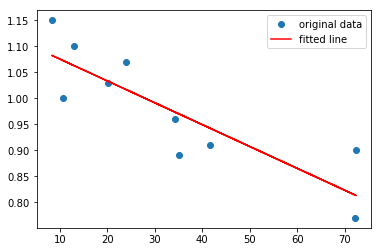

In [56]:
plt.plot(hum, n2, 'o', label='original data')
plt.plot(hum, intercept + slope*hum, 'r', label='fitted line')
plt.legend()
plt.show()

The p-value of .001 indicates there is only a .001 chance the regression parameters are 0 and therefore that there is no relationship between the variables. Consequently, we reject the null hypothesis that there is no relationship between humididty and N2O generation. 

Part B- Calculate the standardized residuals and generate a normal quantile plot of the standardized residuals. Comment regarding what the plot indicates qualitatively regarding the distribution of standardized resiudals.  

In [57]:
# This calculates the predicted value for each observed value
obs_values = n2
pred_values = slope * hum + intercept

# This prints the residual for each pair of observations
residuals = obs_values - pred_values
print(residuals)

[ 0.0869184  -0.03252826 -0.01320879 -0.07984654 -0.07239519  0.036851
  0.06751806 -0.00288874 -0.04392217  0.05350223]


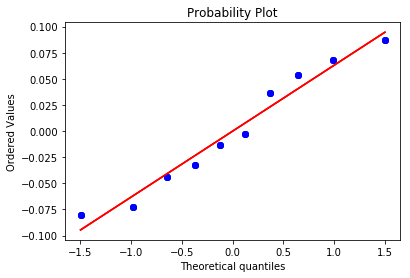

In [63]:
res = sp.probplot(residuals, fit=True, plot=plt)
plt.show()

Part C- Generate a scatter plot of the stanrdized residuals as a function of the regressor variable. Comment whether the residuals appear to be homoscedastic/heteroscedastic. 

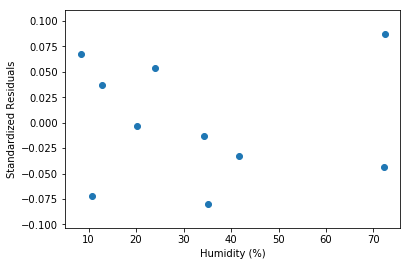

In [67]:
plt.scatter(hum, residuals)
plt.xlabel('Humidity (%)')
plt.ylabel('Standardized Residuals')
plt.show()

The data appear relatively homoscedastic, with the exception of the final data point of humididty 72.4 which varies significantly from the predicted value. 

Part D- Analyze the residuals using Shapiro-Wilk test to assess the null hypothesis that the residuals are normally distributed. What is the p-value for the analysis?

In [70]:
print('The value of the test statistic and the p-value:', sp.shapiro(residuals))

The value of the test statistic and the p-value: (0.9453094005584717, 0.6134504079818726)


Because the value of test statistic (W) is larger than the p-value, we can conclude statisically the residuals are normally distributed. 